In [1]:
"""Assignment 2: Route Finder Using Bi-Directional BFS/DFS

Objective: Use Bi-directional BFS/DFS to solve a navigation problem.

Problem Statement: Represent a city map as a graph where intersections are nodes and roads are edges. Find the shortest path between two locations.

Tasks:
Implement Bi-directional BFS to minimize the number of nodes explored.
Compare the performance of Bi-directional BFS with standard BFS and DFS.
Visualize the search process (e.g., using a library like networkx in Python) """

'Assignment 2: Route Finder Using Bi-Directional BFS/DFS\n\nObjective: Use Bi-directional BFS/DFS to solve a navigation problem.\n\nProblem Statement: Represent a city map as a graph where intersections are nodes and roads are edges. Find the shortest path between two locations.\n\nTasks:\nImplement Bi-directional BFS to minimize the number of nodes explored.\nCompare the performance of Bi-directional BFS with standard BFS and DFS.\nVisualize the search process (e.g., using a library like networkx in Python) '

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

In [3]:


city_map = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F', 'G'],
    'F': ['C', 'E'],
    'G': ['E']
}

In [4]:

def bidirectional_bfs(graph, start, target):
    if start == target:
        return [start]

    
    start_visited = {start}
    target_visited = {target}
    start_queue = deque([start])
    target_queue = deque([target])
    parent_start = {start: None}
    parent_target = {target: None}

    while start_queue and target_queue:
        if _expand_frontier(graph, start_queue, start_visited, parent_start, target_visited):
            return _construct_path(start, target, parent_start, parent_target)

       
        if _expand_frontier(graph, target_queue, target_visited, parent_target, start_visited):
            return _construct_path(start, target, parent_start, parent_target)

    return None  # No path found

In [5]:
def _expand_frontier(graph, queue, visited, parent, other_visited):
    current = queue.popleft()
    for neighbor in graph[current]:
        if neighbor not in visited:
            visited.add(neighbor)
            parent[neighbor] = current
            queue.append(neighbor)
            if neighbor in other_visited:  # Meet in the middle
                return True
    return False

In [6]:
def _construct_path(start, target, parent_start, parent_target):

    path_start = []
    path_target = []

    
    meeting_point = (set(parent_start.keys()) & set(parent_target.keys())).pop()
    current = meeting_point
    while current:
        path_start.append(current)
        current = parent_start[current]

    
    current = parent_target[meeting_point]
    while current:
        path_target.append(current)
        current = parent_target[current]

    return path_start[::-1] + path_target

In [7]:
def bfs(graph, start, target):
    visited = {start}
    queue = deque([(start, [start])])
    while queue:
        current, path = queue.popleft()
        if current == target:
            return path
        for neighbor in graph[current]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, path + [neighbor]))
    return None

In [8]:
def dfs(graph, start, target, path=None, visited=None):
    if path is None:
        path = []
    if visited is None:
        visited = set()

    visited.add(start)
    path.append(start)

    if start == target:
        return path

    for neighbor in graph[start]:
        if neighbor not in visited:
            result = dfs(graph, neighbor, target, path[:], visited)
            if result:
                return result
    return None

In [9]:
def visualize_graph(graph, path=None):
    G = nx.Graph()
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    pos = nx.spring_layout(G) 
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)

    if path:
        edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='red', width=2)

    plt.show()

Bi-Directional BFS Path: ['A', 'B', 'E', 'G']


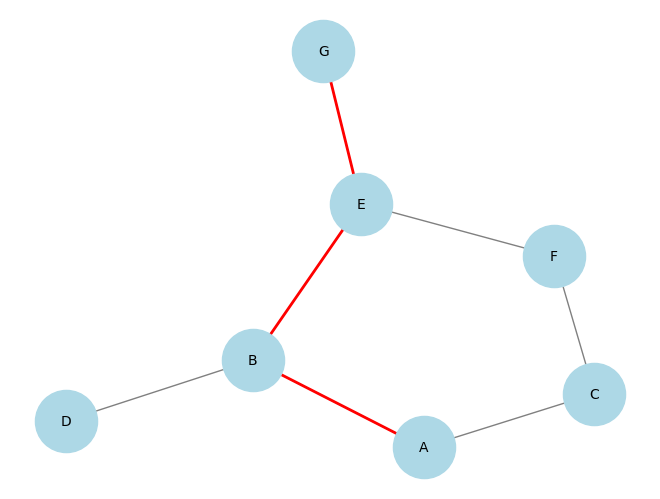

Standard BFS Path: ['A', 'B', 'E', 'G']
Standard DFS Path: ['A', 'B', 'E', 'G']


In [10]:
start = 'A'
target = 'G'

path_bidirectional = bidirectional_bfs(city_map, start, target)
print("Bi-Directional BFS Path:", path_bidirectional)
visualize_graph(city_map, path_bidirectional)

path_bfs = bfs(city_map, start, target)
print("Standard BFS Path:", path_bfs)

path_dfs = dfs(city_map, start, target)
print("Standard DFS Path:", path_dfs)